Data preprocessing

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
import pandas as pd
df=pd.read_csv(r"D:\Datascience\miniproject 3\Flight_Price.csv")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [127]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [128]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [129]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [130]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [131]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [132]:
df=df.dropna()

In [133]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [134]:
df['Day']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
df['Month']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month
df['Year']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.year
df.drop(['Date_of_Journey'],axis=1,inplace=True)
df.head()

C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\806867816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Day']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.day
C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\806867816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=pd.to_datetime(df['Date_of_Journey'],format='%d/%m/%Y').dt.month
C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\806867816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [135]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [136]:
category={'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df['Total_Stops']=df['Total_Stops'].map(category)
model=LabelEncoder()
df['Airline']=model.fit_transform(df['Airline'])
df['Source']=model.fit_transform(df['Source'])
df['Destination']=model.fit_transform(df['Destination'])
df['Route']=model.fit_transform(df['Route'])
df['Additional_Info']=model.fit_transform(df['Additional_Info'])
df.drop(['Route'],axis=1,inplace=True)
df.head()



C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\3750704168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Stops']=df['Total_Stops'].map(category)
C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\3750704168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airline']=model.fit_transform(df['Airline'])
C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\3750704168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,3,0,5,22:20,01:10 22 Mar,2h 50m,0,8,3897,24,3,2019
1,1,3,0,05:50,13:15,7h 25m,2,8,7662,1,5,2019
2,4,2,1,09:25,04:25 10 Jun,19h,2,8,13882,9,6,2019
3,3,3,0,18:05,23:30,5h 25m,1,8,6218,12,5,2019
4,3,0,5,16:50,21:35,4h 45m,1,8,13302,1,3,2019


In [140]:
k=df["Dep_Time"].unique()
mink=k.min()
maxk=k.max()
print(mink)
print(maxk)

00:20
23:55


In [141]:
# Create a new DataFrame column for hours and minutes
df['Duration_Hours'] = df['Duration'].str.extract('(\d+)h').fillna(0).astype(int)  # Extract hours
df['Duration_Minutes'] = df['Duration'].str.extract('(\d+)m').fillna(0).astype(int)  # Extract minutes



C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\1717160655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_Hours'] = df['Duration'].str.extract('(\d+)h').fillna(0).astype(int)  # Extract hours
C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\1717160655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Duration_Minutes'] = df['Duration'].str.extract('(\d+)m').fillna(0).astype(int)  # Extract minutes


In [142]:
df['Dep_Hours'] = df['Dep_Time'].str.split(":").str[0].astype(int)  # Extract hours
df['Dep_Minutes'] = df['Dep_Time'].str.split(":").str[1].astype(int)  # Extract minutes
df.drop(['Duration','Dep_Time'],axis=1,inplace=True)
df.head()

C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\2924757029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dep_Hours'] = df['Dep_Time'].str.split(":").str[0].astype(int)  # Extract hours
C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\2924757029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dep_Minutes'] = df['Dep_Time'].str.split(":").str[1].astype(int)  # Extract minutes
C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\2924757029.py:3: SettingWithCopyWarning: 
A value is trying to b

,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_Hours,Duration_Minutes,Dep_Hours,Dep_Minutes
0,3,0,5,01:10 22 Mar,0,8,3897,24,3,2019,2,50,22,20
1,1,3,0,13:15,2,8,7662,1,5,2019,7,25,5,50
2,4,2,1,04:25 10 Jun,2,8,13882,9,6,2019,19,0,9,25
3,3,3,0,23:30,1,8,6218,12,5,2019,5,25,18,5
4,3,0,5,21:35,1,8,13302,1,3,2019,4,45,16,50


In [143]:
df['clean']=df['Arrival_Time'].str.extract(r"(\d{1,2}:\d{2})")
df.head()

C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\460229629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean']=df['Arrival_Time'].str.extract(r"(\d{1,2}:\d{2})")


,Airline,Source,Destination,Arrival_Time,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_Hours,Duration_Minutes,Dep_Hours,Dep_Minutes,clean
0,3,0,5,01:10 22 Mar,0,8,3897,24,3,2019,2,50,22,20,01:10
1,1,3,0,13:15,2,8,7662,1,5,2019,7,25,5,50,13:15
2,4,2,1,04:25 10 Jun,2,8,13882,9,6,2019,19,0,9,25,04:25
3,3,3,0,23:30,1,8,6218,12,5,2019,5,25,18,5,23:30
4,3,0,5,21:35,1,8,13302,1,3,2019,4,45,16,50,21:35


In [144]:
df['Arr_Hours'] = df['clean'].str.split(":").str[0].astype(int)  # Extract hours
df['Arr_Minutes'] = df['clean'].str.split(":").str[1].astype(int)  # Extract minutes
df.drop(['clean','Arrival_Time'],axis=1,inplace=True)
df.head()

C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\4287048433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arr_Hours'] = df['clean'].str.split(":").str[0].astype(int)  # Extract hours
C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\4287048433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Arr_Minutes'] = df['clean'].str.split(":").str[1].astype(int)  # Extract minutes
C:\Users\Mohan\AppData\Local\Temp\ipykernel_48596\4287048433.py:3: SettingWithCopyWarning: 
A value is trying to be set 

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Duration_Hours,Duration_Minutes,Dep_Hours,Dep_Minutes,Arr_Hours,Arr_Minutes
0,3,0,5,0,8,3897,24,3,2019,2,50,22,20,1,10
1,1,3,0,2,8,7662,1,5,2019,7,25,5,50,13,15
2,4,2,1,2,8,13882,9,6,2019,19,0,9,25,4,25
3,3,3,0,1,8,6218,12,5,2019,5,25,18,5,23,30
4,3,0,5,1,8,13302,1,3,2019,4,45,16,50,21,35


In [157]:
h=df['Arr_Hours'].unique()
h.max()
print(h.min())
m=df['Arr_Minutes'].unique()
print(m.max())
print(m.min())

0
55
0


In [145]:
df['Additional_Info'].unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

In [146]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Day', 'Month', 'Year', 'Duration_Hours', 'Duration_Minutes',
       'Dep_Hours', 'Dep_Minutes', 'Arr_Hours', 'Arr_Minutes'],
      dtype='object')

In [147]:

df['Day'].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21], dtype=int32)

In [148]:
df['Month'].unique()

array([3, 5, 6, 4], dtype=int32)

In [149]:
p=df['Price'].unique()
p


array([ 3897,  7662, 13882, ...,  9790, 12352, 12648])

In [150]:
df['Year'].unique()

array([2019], dtype=int32)

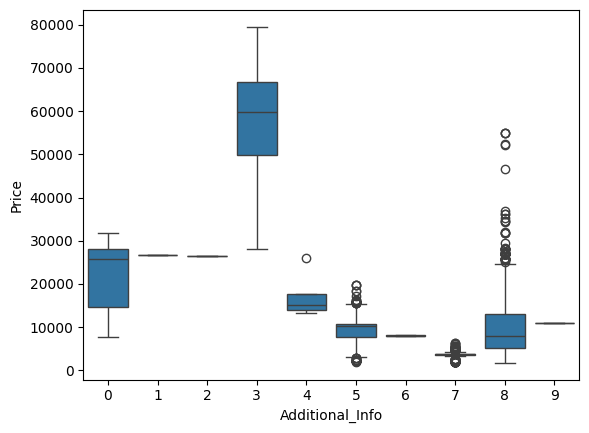

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Additional_Info', y='Price', data=df)
plt.show()


In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,root_mean_squared_error

x=df.drop(['Price'],axis=1)
y=df['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Define your models
models = [
    LinearRegression(),
    KNeighborsRegressor(),
    DecisionTreeRegressor(max_depth=10, min_samples_split=5, min_samples_leaf=3, random_state=42),
    RandomForestRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor()
]

# Initialize a list to store results
results = []

# Loop through the models
for model in models:
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # Calculate metrics
    train_mae = mean_absolute_error(y_train, train_pred)
    train_mse = mean_squared_error(y_train, train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_pred)

    test_mae = mean_absolute_error(y_test, test_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, test_pred)

    # Append results
    results.append({
        "Model": type(model).__name__,
        "Train_MAE": train_mae,
        "Test_MAE": test_mae,
        "Train_MSE": train_mse,
        "Test_MSE": test_mse,
        "Train_RMSE": train_rmse,
        "Test_RMSE": test_rmse,
        "Train_R2": train_r2,
        "Test_R2": test_r2
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Reformat columns for easier reading
results_df = results_df[[
    "Model", 
    "Train_MAE","Test_MAE", "Train_MSE","Test_MSE",
    "Train_RMSE" ,"Test_RMSE","Train_R2","Test_R2"
]]

# Print the DataFrame
results_df.head(6)


,Model,Train_MAE,Test_MAE,Train_MSE,Test_MSE,Train_RMSE,Test_RMSE,Train_R2,Test_R2
0,LinearRegression,2440.108993,2439.593045,1.195116e+07,1.211628e+07,3457.045179,3480.844672,0.435988,0.438074
1,KNeighborsRegressor,1293.371445,1711.944970,4.912456e+06,7.743656e+06,2216.406193,2782.742469,0.768166,0.640867
2,DecisionTreeRegressor,872.667906,1046.314853,2.271855e+06,4.174841e+06,1507.267552,2043.242735,0.892784,0.806380
3,RandomForestRegressor,273.373924,660.119466,4.481011e+05,2.944383e+06,669.403509,1715.920496,0.978853,0.863446
4,AdaBoostRegressor,2669.365427,2628.781343,1.058681e+07,1.030324e+07,3253.738212,3209.865419,0.500376,0.522159
5,GradientBoostingRegressor,1214.982145,1242.910888,3.576302e+06,3.481635e+06,1891.111424,1865.913859,0.831223,0.838530


RandomForestRegressor and GradientBoostingRegressor gives the best score

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
gb_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Perform Randomized Search
gb_random_search = RandomizedSearchCV(
    estimator=gb, 
    param_distributions=gb_param_grid, 
    n_iter=50,  # Number of combinations to try
    cv=5,       # Cross-validation folds
    n_jobs=-1, 
    random_state=42
)

# Fit to training data
gb_random_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters for GradientBoosting:", gb_random_search.best_params_)


Best Parameters for GradientBoosting: {'subsample': 0.8, 'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10, 'learning_rate': 0.05}


In [84]:
best_gb = GradientBoostingRegressor(
    subsample=0.8, 
    n_estimators=300, 
    min_samples_split=5, 
    min_samples_leaf=4, 
    max_depth=10, 
    learning_rate=0.05, 
    random_state=42
)
best_gb.fit(x_train, y_train)
y_test_pred = best_gb.predict(x_test)
y_train_pred = best_gb.predict(x_train)

from sklearn.metrics import mean_squared_error, r2_score
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R2:", r2_score(y_test, y_test_pred))


Train RMSE: 503.3017368010788
Train R2: 0.9880454009087671
Test RMSE: 1656.9567752002051
Test R2: 0.8726695768897824


In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define parameter grid
rf_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search
rf_random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=rf_param_grid, 
    n_iter=50,  # Number of combinations to try
    cv=5,       # Cross-validation folds
    scoring='neg_mean_squared_error', 
    verbose=2, 
    n_jobs=-1, 
    random_state=42
)

# Fit to training data
rf_random_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters for RandomForest:", rf_random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\Mohan\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
75 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mohan\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mohan\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Mohan\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\base.py", line 666, in

Best Parameters for RandomForest: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}


In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Random Forest Regressor with best parameters
rf = RandomForestRegressor(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    random_state=42
)

# Train the model
rf.fit(x_train, y_train)

# Predict on train and test sets
train_pred_rf = rf.predict(x_train)
test_pred_rf = rf.predict(x_test)

# Calculate metrics

train_mse_rf = mean_squared_error(y_train, train_pred_rf)
train_rmse_rf = np.sqrt(train_mse_rf)
train_r2_rf = r2_score(y_train, train_pred_rf)

test_mse_rf = mean_squared_error(y_test, test_pred_rf)
test_rmse_rf = np.sqrt(test_mse_rf)
test_r2_rf = r2_score(y_test, test_pred_rf)

# Print metrics
print(f"Train RMSE: {train_rmse_rf}")
print(f"Train R2: {train_r2_rf}")

print(f"Test RMSE: {test_rmse_rf}")
print(f"Test R2: {test_r2_rf}")


Train RMSE: 666.0907041777274
Train R2: 0.9790615319492842
Test RMSE: 1504.7780031311802
Test R2: 0.8949841886754515


compare to gradient ,random forest regressor is best

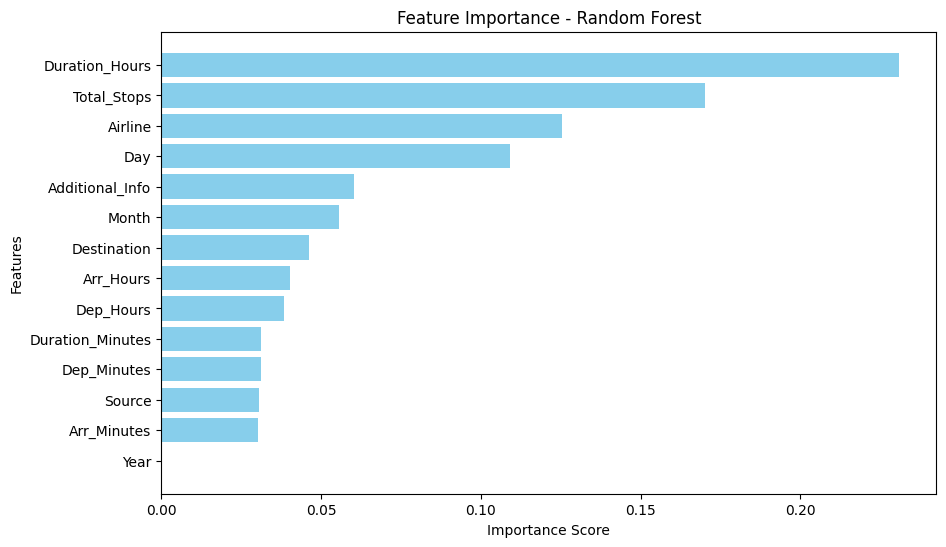

In [87]:
# Feature importance from Random Forest
import matplotlib.pyplot as plt

feature_importances = rf.feature_importances_
features = x.columns  # Assuming x is your feature set
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.show()


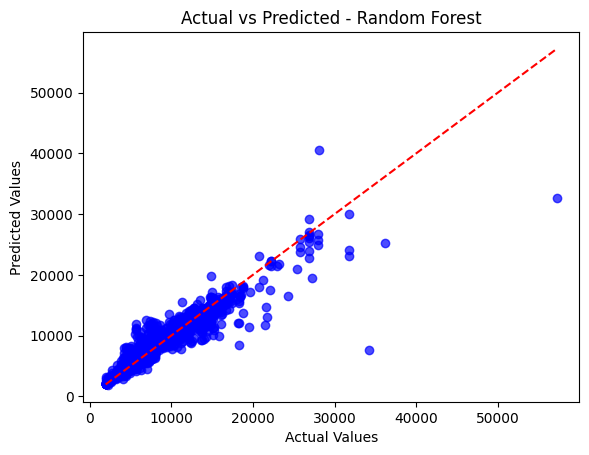

In [88]:
import matplotlib.pyplot as plt

plt.scatter(y_test, test_pred_rf, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Random Forest")
plt.show()


In [89]:
import joblib
joblib.dump(rf, 'final_random_forest_model.pkl')


['final_random_forest_model.pkl']

In [28]:
pip install mlflow

  Using cached pyarrow-18.1.0-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/27.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/27.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/27.4 MB ? eta -:--:--
   ---------------------------------------- 0.3/27.4 MB ? eta -:--:--
    --------------------------------------- 0.5/27.4 MB 730.2 kB/s eta 0:00:37
    --------------------------------------- 0.5/27.4 MB 730.2 kB/s eta 0:00:37
    --------------------------------------- 0.5/27.4 MB 730.2 kB/s eta 0:00:37
   - -------------------------------------- 0.8/27.4 MB 466.0 kB/s eta 0:00:58
   - -------------------------------------- 0.8/27.4 MB 466.0 kB/s eta 0:00:58
   - -------------------------------------- 0.8/27.4 MB 466.0 kB/s eta 0:00:58
   - ------------------------------------


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [91]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Start MLflow experiment
mlflow.set_experiment("Flight Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000")


model = rf  
model_name = "RandomForest"

with mlflow.start_run(run_name=model_name):
    # Log model parameters
    mlflow.log_param("n_estimators", 500)
    mlflow.log_param("max_depth", 20)
    mlflow.log_param("min_samples_split", 2)
    mlflow.log_param("min_samples_leaf", 1)
    mlflow.log_param("max_features", "log2")

    # Predict and calculate metrics
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Log metrics
    mlflow.log_metric("Train RMSE", train_rmse)
    mlflow.log_metric("Test RMSE", test_rmse)
    mlflow.log_metric("Train R2", train_r2)
    mlflow.log_metric("Test R2", test_r2)

    # Log the model
    mlflow.sklearn.log_model(model, artifact_path="model")

    # Print metrics to track progress
    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"Train R2: {train_r2}, Test R2: {test_r2}")

# End the experiment
print("MLflow Logging Complete")



2025/01/12 11:37:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: RandomForest
Train RMSE: 666.0907041777274, Test RMSE: 1504.7780031311802
Train R2: 0.9790615319492842, Test R2: 0.8949841886754515
🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/462403613250819184/runs/ff4acb96f3674aa79a859fbd8aff064f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/462403613250819184
MLflow Logging Complete


In [92]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Start MLflow experiment
mlflow.set_experiment("Flight Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Define and initialize the Gradient Boosting Regressor
model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42
)
model_name = "GradientBoosting"

# Train the model
model.fit(x_train, y_train)

# Start MLflow tracking
with mlflow.start_run(run_name=model_name):
    # Log model parameters
    mlflow.log_param("n_estimators", 200)
    mlflow.log_param("learning_rate", 0.1)
    mlflow.log_param("max_depth", 5)
    mlflow.log_param("min_samples_split", 3)
    mlflow.log_param("min_samples_leaf", 2)

    # Predict and calculate metrics
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Log metrics
    mlflow.log_metric("Train RMSE", train_rmse)
    mlflow.log_metric("Test RMSE", test_rmse)
    mlflow.log_metric("Train R2", train_r2)
    mlflow.log_metric("Test R2", test_r2)

    # Log the model
    mlflow.sklearn.log_model(model, artifact_path="model")

    # Print metrics to track progress
    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"Train R2: {train_r2}, Test R2: {test_r2}")

# End the experiment
print("MLflow Logging Complete")


2025/01/12 11:38:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: GradientBoosting
Train RMSE: 1133.0748076194668, Test RMSE: 1685.3154504785314
Train R2: 0.9394107850385052, Test R2: 0.8682737803426052
🏃 View run GradientBoosting at: http://127.0.0.1:5000/#/experiments/462403613250819184/runs/63abad0a9f704c74b865c0c4aa2f226d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/462403613250819184
MLflow Logging Complete


In [23]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Start MLflow experiment
mlflow.set_experiment("Flight Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Define and initialize the Gradient Boosting Regressor
model = LinearRegression()
model_name = "Linearregression"

# Train the model
model.fit(x_train, y_train)

# Start MLflow tracking
with mlflow.start_run(run_name=model_name):

    # Predict and calculate metrics
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Log metrics
    mlflow.log_metric("Train RMSE", train_rmse)
    mlflow.log_metric("Test RMSE", test_rmse)
    mlflow.log_metric("Train R2", train_r2)
    mlflow.log_metric("Test R2", test_r2)

    # Log the model
    mlflow.sklearn.log_model(model, artifact_path="model")

    # Print metrics to track progress
    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"Train R2: {train_r2}, Test R2: {test_r2}")

# End the experiment
print("MLflow Logging Complete")


2025/01/11 12:04:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: Linearregression
Train RMSE: 3457.045178845118, Test RMSE: 3480.844672135343
Train R2: 0.4359880982907075, Test R2: 0.4380740199646048
🏃 View run Linearregression at: http://127.0.0.1:5000/#/experiments/462403613250819184/runs/7a427378f5144cea946be45d3693d8d8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/462403613250819184
MLflow Logging Complete


In [24]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Start MLflow experiment
mlflow.set_experiment("Flight Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Define and initialize the Gradient Boosting Regressor
model = KNeighborsRegressor()
model_name = "KNeighborsRegressor"

# Train the model
model.fit(x_train, y_train)

# Start MLflow tracking
with mlflow.start_run(run_name=model_name):

    # Predict and calculate metrics
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Log metrics
    mlflow.log_metric("Train RMSE", train_rmse)
    mlflow.log_metric("Test RMSE", test_rmse)
    mlflow.log_metric("Train R2", train_r2)
    mlflow.log_metric("Test R2", test_r2)

    # Log the model
    mlflow.sklearn.log_model(model, artifact_path="model")

    # Print metrics to track progress
    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"Train R2: {train_r2}, Test R2: {test_r2}")

# End the experiment
print("MLflow Logging Complete")


2025/01/11 12:07:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: KNeighborsRegressor
Train RMSE: 2216.4061926438335, Test RMSE: 2782.742468670846
Train R2: 0.7681661391001948, Test R2: 0.6408665513842012
🏃 View run KNeighborsRegressor at: http://127.0.0.1:5000/#/experiments/462403613250819184/runs/bd3fc1cc74e142d38610c957c48d88df
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/462403613250819184
MLflow Logging Complete


In [26]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

# Start MLflow experiment
mlflow.set_experiment("Flight Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Define and initialize the Gradient Boosting Regressor
model = AdaBoostRegressor(
    n_estimators=500,
    learning_rate=0.05,
    random_state=42
)
model_name = "Adaboost"

# Train the model
model.fit(x_train, y_train)

# Start MLflow tracking
with mlflow.start_run(run_name=model_name):
    # Log model parameters
    mlflow.log_param("n_estimators", 500)
    mlflow.log_param("learning_rate", 0.05)
    mlflow.log_param("random_state", 42)


    # Predict and calculate metrics
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Log metrics
    mlflow.log_metric("Train RMSE", train_rmse)
    mlflow.log_metric("Test RMSE", test_rmse)
    mlflow.log_metric("Train R2", train_r2)
    mlflow.log_metric("Test R2", test_r2)

    # Log the model
    mlflow.sklearn.log_model(model, artifact_path="model")

    # Print metrics to track progress
    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"Train R2: {train_r2}, Test R2: {test_r2}")

# End the experiment
print("MLflow Logging Complete")


2025/01/11 12:11:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: Adaboost
Train RMSE: 3154.29213790576, Test RMSE: 3131.1965505215694
Train R2: 0.530449848482522, Test R2: 0.545294210783984
🏃 View run Adaboost at: http://127.0.0.1:5000/#/experiments/462403613250819184/runs/b557469cb8b54e098c9d02ab06386833
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/462403613250819184
MLflow Logging Complete


In [27]:
import mlflow
import mlflow.sklearn
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Start MLflow experiment
mlflow.set_experiment("Flight Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Model initialization with parameters
model = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
model_name = "DecisionTreeRegressor"

# Train the model
model.fit(x_train, y_train)

# Start MLflow tracking
with mlflow.start_run(run_name=model_name):
    # Log model parameters
    mlflow.log_param("max_depth", 10)
    mlflow.log_param("min_samples_split", 5)
    mlflow.log_param("min_samples_leaf", 3)
    mlflow.log_param("random_state", 42)

    # Predict and calculate metrics
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Log metrics
    mlflow.log_metric("Train RMSE", train_rmse)
    mlflow.log_metric("Test RMSE", test_rmse)
    mlflow.log_metric("Train R2", train_r2)
    mlflow.log_metric("Test R2", test_r2)

    # Log the model
    mlflow.sklearn.log_model(model, artifact_path="model")

    # Print metrics to track progress
    print(f"Model: {model_name}")
    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"Train R2: {train_r2}, Test R2: {test_r2}")

# End the experiment
print("MLflow Logging Complete")


2025/01/11 12:12:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Model: DecisionTreeRegressor
Train RMSE: 1507.267552351404, Test RMSE: 2043.242735199874
Train R2: 0.8927841833114231, Test R2: 0.8063802073335249
🏃 View run DecisionTreeRegressor at: http://127.0.0.1:5000/#/experiments/462403613250819184/runs/1145f8533e25420d8f9e794bd11fc039
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/462403613250819184
MLflow Logging Complete
